In [4]:
#########################################################################
########## JEST - Junior Enterprise for Science and Technology ##########
#########################################################################
#########################################################################
#################### Machine Learning Workshop ##########################
#########################################################################

In [20]:
from sklearn import svm
from sklearn import ensemble
import sklearn as sk
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import math
%matplotlib notebook

gameSalesData = pd.read_csv('../data/gamesales/gamesales.csv', sep = ',')

# Remove samples with NaN value in the Publisher class
gameSalesData.dropna(axis=0, subset = ['Publisher'], inplace=True)

list(gameSalesData)

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

Sales Mean:  0.5343834383439082  millions
Number of games with sales > 1 million:  2054
Total of games:  16665


<IPython.core.display.Javascript object>


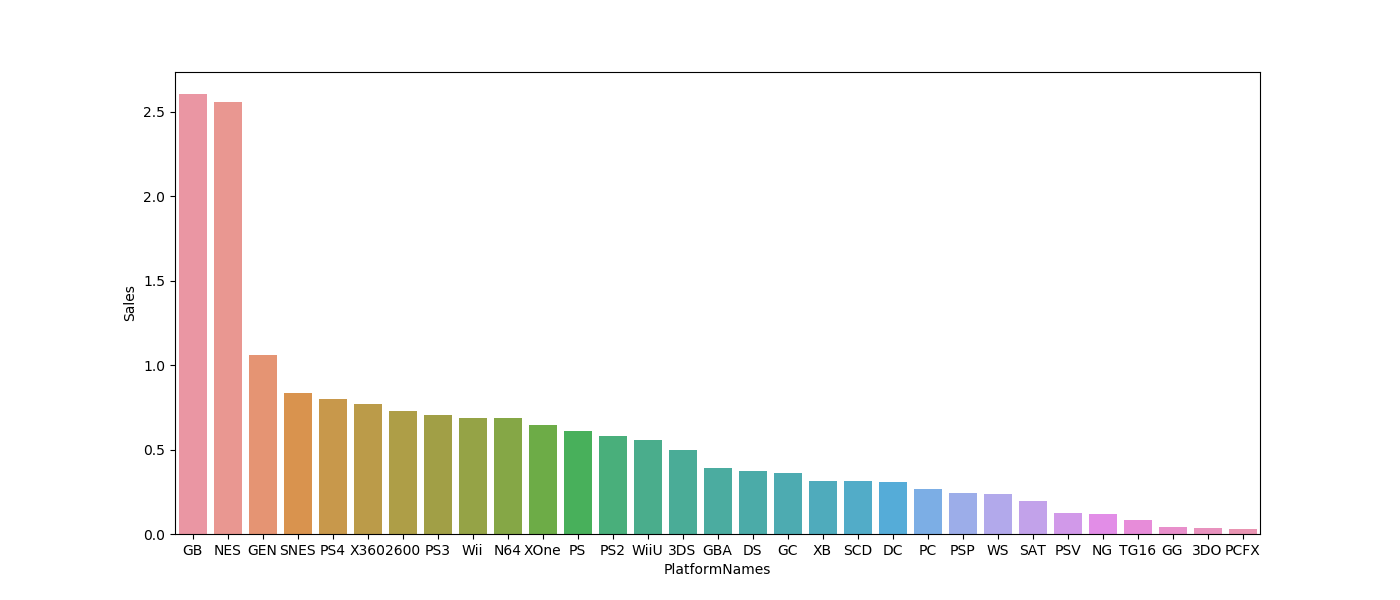

In [21]:
# 1st. - What do I want to know from this dataset?
# Sales > than 1 million 

print('Sales Mean: ', np.mean(gameSalesData.Global_Sales), ' millions')
print('Number of games with sales > 1 million: ', len(gameSalesData.Name.loc[gameSalesData.Global_Sales > 1]))
print('Total of games: ', len(gameSalesData))

# Let's try and find some features than can influence sales:

# Sales (per game) per Platfrom 
platform = pd.DataFrame( columns = ['PlatformNames', 'Sales'])
platform['PlatformNames'] = gameSalesData.Platform.unique() 
for name in platform.PlatformNames:
    # Global_Sales by platform / number of games by said platform
    platform['Sales'].loc[platform.PlatformNames == name] = sum(gameSalesData.Global_Sales.loc[gameSalesData.Platform == name])\
    /len(gameSalesData.Name.loc[gameSalesData.Platform == name])

# Sorting Values
platform = platform.sort_values(by = ['Sales'], ascending = False)  

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x = 'PlatformNames', y = 'Sales', data = platform)
plt.ylabel = "Global Sales"
plt.xlabel = "Platform"
plt.show()

<IPython.core.display.Javascript object>


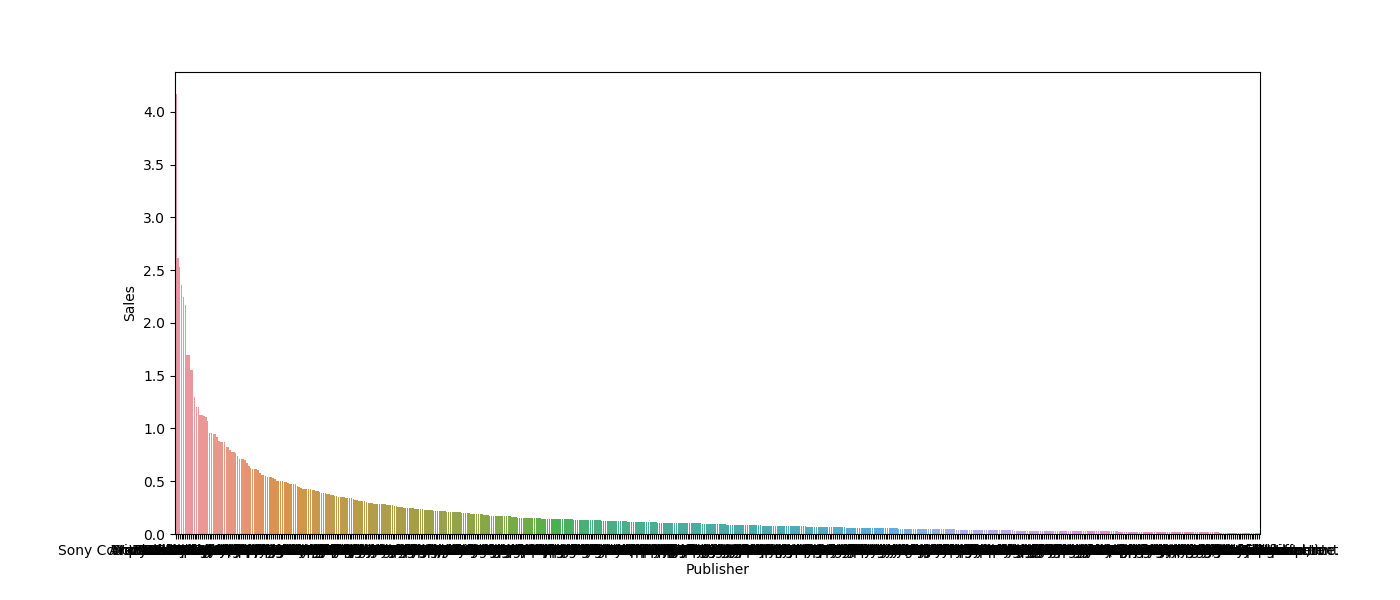

26                                 Palcom
35                                Red Orb
0                                Nintendo
37                    Arena Entertainment
43                            UEP Systems
22                              RedOctane
56                            Hello Games
54                                  Valve
16     Sony Computer Entertainment Europe
64                       Westwood Studios
1                  Microsoft Game Studios
46                                 Imagic
79                      Black Label Games
45                                  Maxis
24                       Enix Corporation
6                      Bethesda Softworks
9                              SquareSoft
49                         Valve Software
2                    Take-Two Interactive
18                              LucasArts
42                            989 Studios
27                     Hasbro Interactive
29                        Fox Interactive
3             Sony Computer Entert

In [3]:
# Sales by Publisher

publisherSales = pd.DataFrame( columns = ['Publisher', 'Sales'])
publisherSales['Publisher'] = gameSalesData.Publisher.unique() 

for name in publisherSales.Publisher:
    # Global_Sales by Publisher / number of games by said publisher
    publisherSales['Sales'].loc[publisherSales.Publisher == name] = sum(gameSalesData.Global_Sales.loc[gameSalesData.Publisher == name])\
        /len(gameSalesData.Name.loc[gameSalesData.Publisher == name])

# Sorting Values
publisherSales = publisherSales.sort_values(by = ['Sales'], ascending = False) 

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x = 'Publisher', y = 'Sales', data = publisherSales)
plt.ylabel = "Global Sales"
plt.xlabel = "Publisher"
plt.show()

print(publisherSales.Publisher)

# More analysis can and should be done to determine which features offer a better correlation to your labels
# This includes correlation and statistical tests.
# Importance plot can be also used (after the classifier is made) to determine which features are more usefull


In [14]:
#  2nd. - Our first classifier
# SVM

# Transform nominal variables (Publisher and Platform) to numeric:

publishers = gameSalesData.Publisher.unique() 
numericalPublishers = list(range(1,len(publishers) + 1))
platforms = gameSalesData.Platform.unique()
numericalPlatforms = list(range(1, len(platforms) + 1))

gameSalesData.Publisher.replace(publishers, numericalPublishers, inplace = True)
gameSalesData.Platform.replace(platforms, numericalPlatforms, inplace= True)

# Create Labels

labels = []
for i, sales in enumerate(gameSalesData.Global_Sales):
    if sales >= 1:
        labels.append(1)
    else:
        labels.append(0)
        
gameSalesData['Labels'] = labels

# Get train/test (divide  our data in a set to train the classifier, and other to test it)
# Since the dataset is a bit unbalanced be carefull when doing this! (provide a minimum of values for each set
# from the smallest class, for example) !!! This is not done on this example, to show some problems this leads to !!!

indexes = np.random.rand(len(gameSalesData)) < 0.7
train = gameSalesData[indexes]
test = gameSalesData[~indexes]

classifier1 = svm.SVC()
classifier1.fit(train[['Publisher', 'Platform']], train.Labels)
predictions1 = classifier1.predict(test[['Publisher', 'Platform']])


In [18]:
# 3rd - Evaluate your classifier (Metrics)

tn, fp, fn, tp = sk.metrics.confusion_matrix(test.Labels, predictions1).ravel()
accuracy = (tp + tn) / (tp + tn + fn + fp)
sensitivity = tp / (tp + fn)
specificity = tp / (tn + fp)

print('SVM')
print('Accuracy: ', accuracy, '\nSensitivity: ', sensitivity, '\nSpecificity: ', specificity)

# The accuracy is high because  most of the values belong to only one class (the classifier is overfitting,
# and classifying everything as less that 1 million):
print('\nConfusion Matrix:\n',sk.metrics.confusion_matrix(test.Labels, predictions1))

# Never forget to evaluate all the metrics, and not only the accuracy!

SVM
Accuracy:  0.874601910828 
Sensitivity:  0.0838414634146 
Specificity:  0.0125915750916

Confusion Matrix
 [[4339   29]
 [ 601   55]]


In [ ]:
# https://www.kaggle.com
# https://www.deeplearning.ai